# Qredo tokenomics simulation - staking profitability

### June 2023

**Contents:**

- Staker APR
- Staker minimum weekly rewards
- Average rewards per validator
- Validator profit


In [1]:
import os
import pickle
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import matplotlib.dates as mdates
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')

## 1. Load data

In [2]:
forecast_length = 365*2
outfolder = os.path.realpath("../data/sim_data")

In [3]:
# load
df_file = os.path.join(outfolder, f"sample_by_scenario.pickle")
with open(df_file, "rb") as fp:
    df = pickle.load(fp)

# process columns
df["apr"] = 365.0*(df["total_staking_rewards"]-df["validators_rewards"])/df["staking_tvl"]
df["min_staker_week_reward"] = 2500*7*(df["apr"]/365)
df["av_validator_reward"] = df["validators_rewards"] / df["n_validators"]
df["validator_profit"] = df["av_validator_reward"] * df["token_price"] - 200.0
df["date"] = df["iteration"].apply(lambda x: dt.datetime(2023, 6, 15)+dt.timedelta(days=x)).values

# convert units
mill_cols = ["circ_supply", 'day_vested', 'day_locked', 'day_released','day_burned',
             "total_staking_rewards", "validators_rewards","ecosystem_fund", "staking_tvl"]
df[mill_cols] = df[mill_cols]/(10**6)

len(df)

21286800

In [4]:
df.columns

Index(['iteration', 'token_scenario', 'usage_scenario', 'staking_scenario',
       'circ_supply', 'day_burned', 'day_vested', 'day_locked', 'day_released',
       'staking_rewards_vested', 'staking_rewards_ecosystem',
       'total_staking_rewards', 'validators_rewards', 'market_cap',
       'n_validators', 'token_price', 'day_burn_fees',
       'day_service_fee_locked', 'ecosystem_fund', 'staking_tvl',
       'year_inflation', 'day_inflation', 'apr', 'min_staker_week_reward',
       'av_validator_reward', 'validator_profit', 'date'],
      dtype='object')

In [5]:
combined_df = df[(df["staking_scenario"]==df["usage_scenario"]) & (df["staking_scenario"]==df["token_scenario"])]

## 2. Staker APR

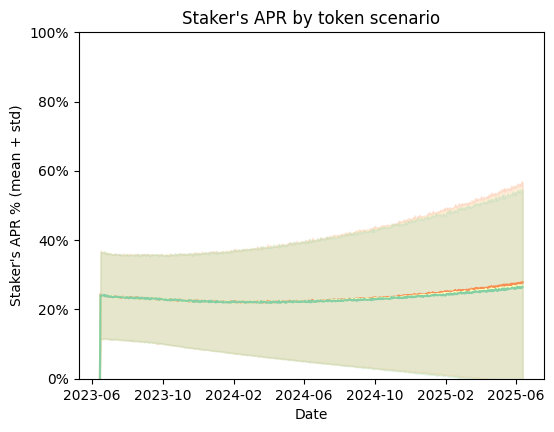

In [6]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="apr", hue="token_scenario", errorbar="sd", palette="Spectral")
fig.axes.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.ylim(0,1)
plt.title("Staker's APR by token scenario") 
plt.xlabel("Date") 
plt.ylabel("Staker's APR % (mean + std)")
fig.get_legend().remove()
plt.show()

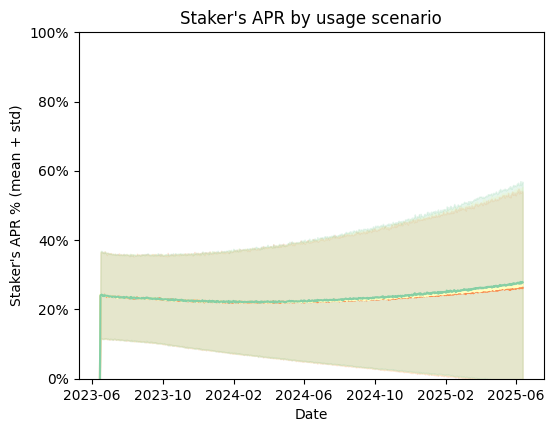

In [7]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="apr", hue="usage_scenario", errorbar="sd", palette="Spectral")
fig.axes.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.ylim(0,1)
plt.title("Staker's APR by usage scenario") 
plt.xlabel("Date") 
plt.ylabel("Staker's APR % (mean + std)")
fig.get_legend().remove()
plt.show()

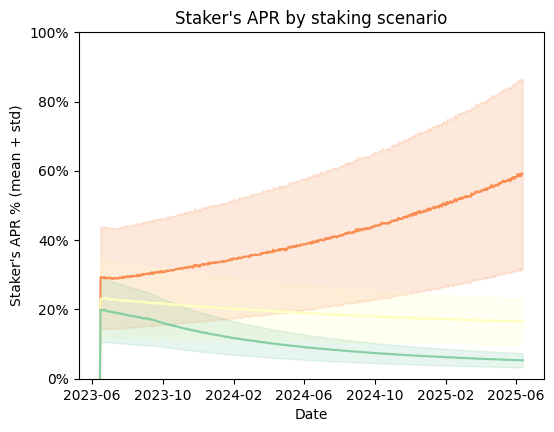

In [8]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="apr", hue="staking_scenario", errorbar="sd", palette="Spectral")
fig.axes.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.ylim(0,1)
plt.title("Staker's APR by staking scenario") 
plt.xlabel("Date") 
plt.ylabel("Staker's APR % (mean + std)")
fig.get_legend().remove()
plt.show()

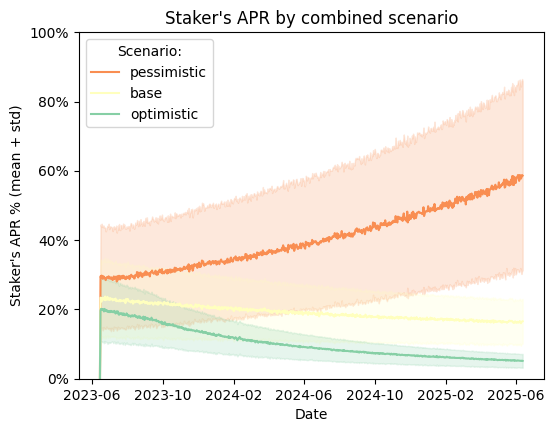

In [9]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=combined_df, x="date", y="apr", hue="staking_scenario", errorbar="sd", palette="Spectral")
fig.axes.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=None, symbol='%', is_latex=False))
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.ylim(0,1)
plt.title("Staker's APR by combined scenario") 
plt.xlabel("Date") 
plt.ylabel("Staker's APR % (mean + std)")
plt.legend(loc='upper left', title="Scenario:")
plt.show()

In [20]:
df[df["iteration"]==1].groupby("staking_scenario")["apr"].mean()

staking_scenario
base           0.230994
optimistic     0.199066
pessimistic    0.292468
Name: apr, dtype: float64

In [21]:
df[df["iteration"]==729].groupby("staking_scenario")["apr"].mean()

staking_scenario
base           0.165832
optimistic     0.053113
pessimistic    0.591631
Name: apr, dtype: float64

## 3. Staker minimum weekly rewards

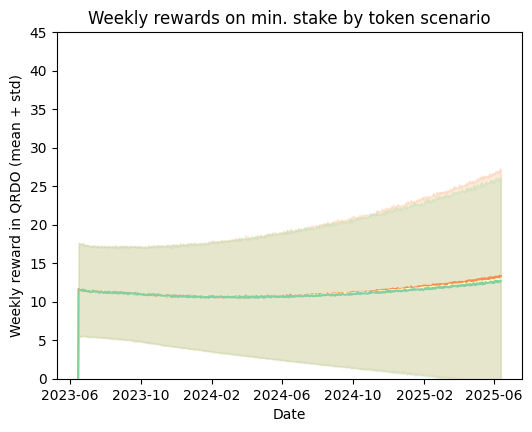

In [16]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="min_staker_week_reward", hue="token_scenario", errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.ylim(0,45)
plt.title("Weekly rewards on min. stake by token scenario") 
plt.xlabel("Date") 
plt.ylabel("Weekly reward in QRDO (mean + std)")
fig.get_legend().remove()
plt.show()

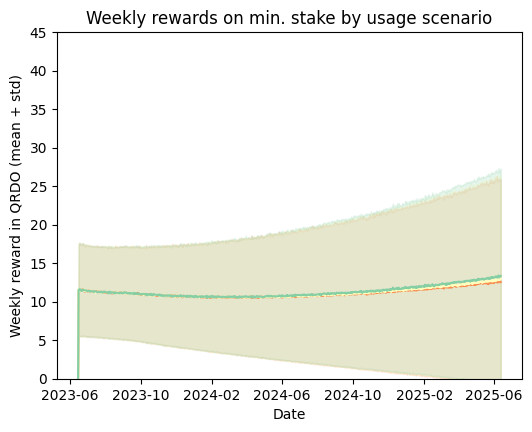

In [17]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="min_staker_week_reward", hue="usage_scenario", errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.ylim(0,45)
plt.title("Weekly rewards on min. stake by usage scenario") 
plt.xlabel("Date") 
plt.ylabel("Weekly reward in QRDO (mean + std)")
fig.get_legend().remove()
plt.show()

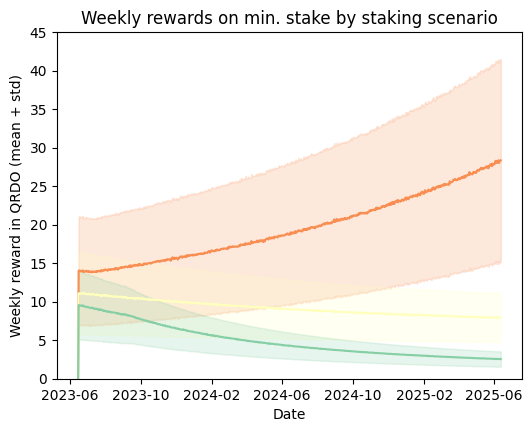

In [18]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="min_staker_week_reward", hue="staking_scenario", errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.ylim(0,45)
plt.title("Weekly rewards on min. stake by staking scenario") 
plt.xlabel("Date") 
plt.ylabel("Weekly reward in QRDO (mean + std)")
fig.get_legend().remove()
plt.show()

In [22]:
df[df["iteration"]==1].groupby("staking_scenario")["min_staker_week_reward"].mean()

staking_scenario
base           11.075049
optimistic      9.544246
pessimistic    14.022426
Name: min_staker_week_reward, dtype: float64

In [23]:
df[df["iteration"]==729].groupby("staking_scenario")["min_staker_week_reward"].mean()

staking_scenario
base            7.950857
optimistic      2.546537
pessimistic    28.365886
Name: min_staker_week_reward, dtype: float64

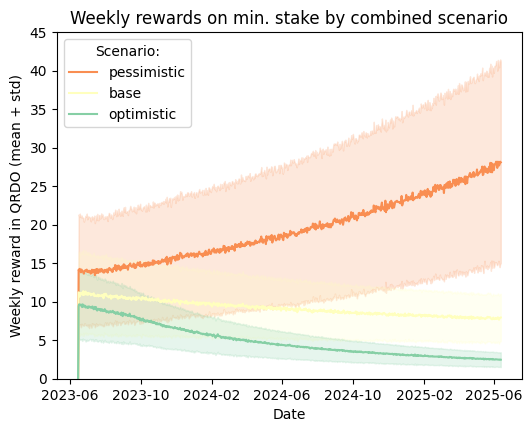

In [19]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=combined_df, x="date", y="min_staker_week_reward", hue="staking_scenario", errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.ylim(0,45)
plt.title("Weekly rewards on min. stake by combined scenario") 
plt.xlabel("Date") 
plt.ylabel("Weekly reward in QRDO (mean + std)")
plt.legend(loc='upper left', title="Scenario:")
plt.show()

## 4. Average rewards per validator

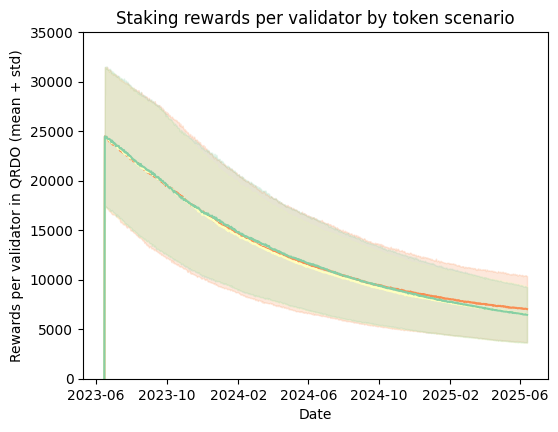

In [45]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="av_validator_reward", hue="token_scenario", 
                   errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.ylim(0,35_000)
plt.title("Staking rewards per validator by token scenario") 
plt.xlabel("Date") 
plt.ylabel("Rewards per validator in QRDO (mean + std)")
fig.get_legend().remove()
plt.show()

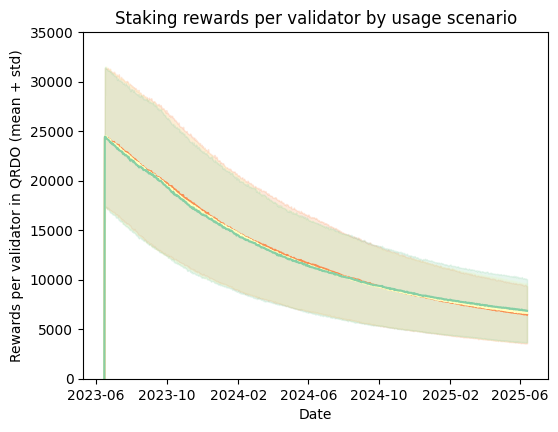

In [46]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="av_validator_reward", hue="usage_scenario", 
                   errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.ylim(0,35_000)
plt.title("Staking rewards per validator by usage scenario") 
plt.xlabel("Date") 
plt.ylabel("Rewards per validator in QRDO (mean + std)")
fig.get_legend().remove()
plt.show()

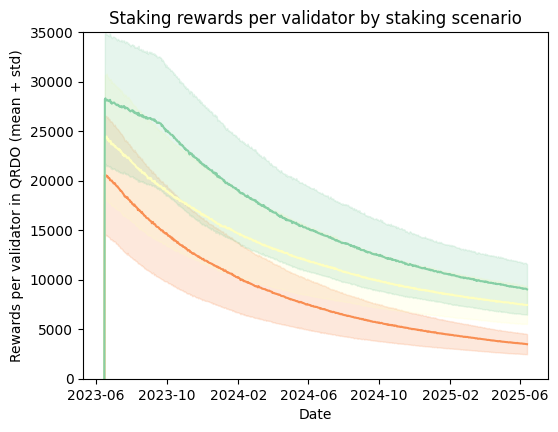

In [47]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="av_validator_reward", hue="staking_scenario", 
                   errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.ylim(0,35_000)
plt.title("Staking rewards per validator by staking scenario") 
plt.xlabel("Date") 
plt.ylabel("Rewards per validator in QRDO (mean + std)")
fig.get_legend().remove()
plt.show()

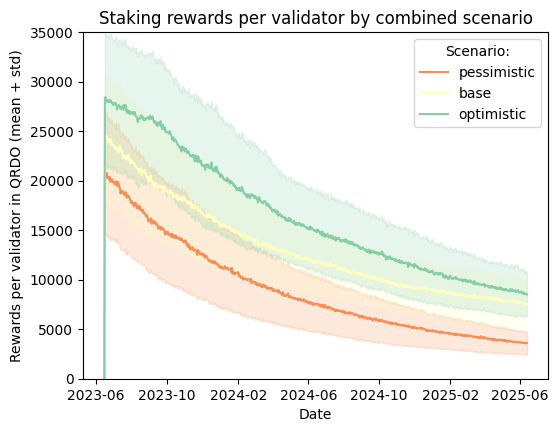

In [48]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=combined_df, x="date", y="av_validator_reward", hue="staking_scenario", 
                   errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.ylim(0,35_000)
plt.title("Staking rewards per validator by combined scenario") 
plt.xlabel("Date") 
plt.ylabel("Rewards per validator in QRDO (mean + std)")
plt.legend(loc='upper right', title="Scenario:")
plt.show()

## 5. Validator profit

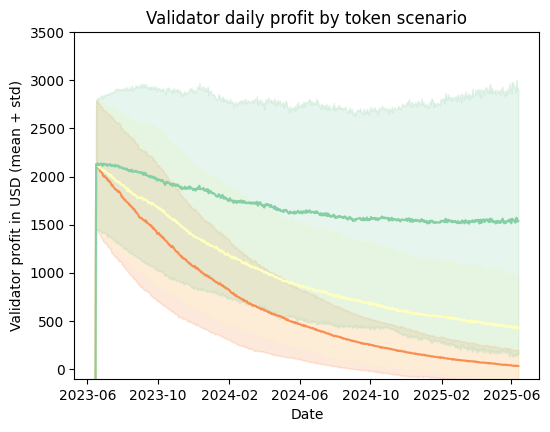

In [49]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="validator_profit", hue="token_scenario", 
                   errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.ylim(-100,3500)
plt.title("Validator daily profit by token scenario") 
plt.xlabel("Date") 
plt.ylabel("Validator profit in USD (mean + std)")
fig.get_legend().remove()
plt.show()

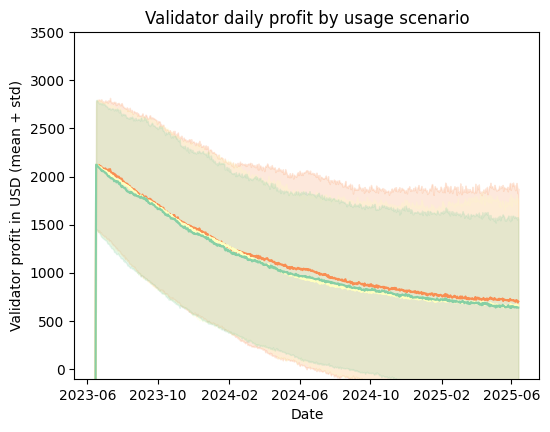

In [50]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="validator_profit", hue="usage_scenario", 
                   errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.ylim(-100,3500)
plt.title("Validator daily profit by usage scenario") 
plt.xlabel("Date") 
plt.ylabel("Validator profit in USD (mean + std)")
fig.get_legend().remove()
plt.show()

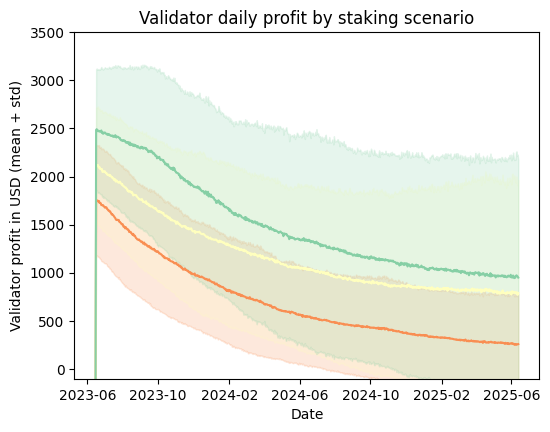

In [51]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=df, x="date", y="validator_profit", hue="staking_scenario", 
                   errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.ylim(-100,3500)
plt.title("Validator daily profit by staking scenario") 
plt.xlabel("Date") 
plt.ylabel("Validator profit in USD (mean + std)")
fig.get_legend().remove()
plt.show()

In [31]:
df[df["iteration"]==1].groupby("staking_scenario")["validator_profit"].mean()

staking_scenario
base           2120.810033
optimistic     2483.432930
pessimistic    1754.671283
Name: validator_profit, dtype: float64

In [32]:
df[df["iteration"]==729].groupby("staking_scenario")["validator_profit"].mean()

staking_scenario
base           791.171246
optimistic     950.562804
pessimistic    259.037151
Name: validator_profit, dtype: float64

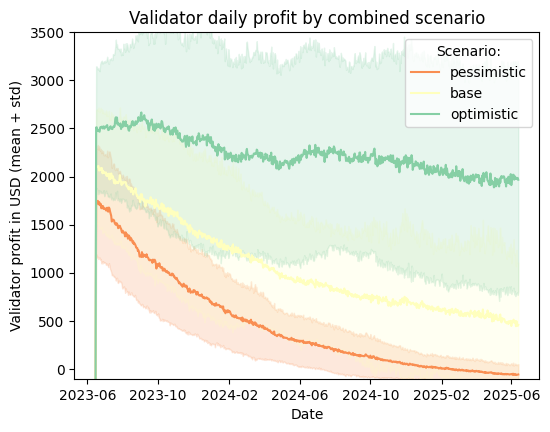

In [52]:
plt.figure(figsize=(6,4.5))
fig = sns.lineplot(data=combined_df, x="date", y="validator_profit", hue="usage_scenario", 
                   errorbar="sd", palette="Spectral")
fig.xaxis.set_major_locator(mdates.MonthLocator(interval=4))
plt.ylim(-100,3500)
plt.title("Validator daily profit by combined scenario") 
plt.xlabel("Date") 
plt.ylabel("Validator profit in USD (mean + std)")
plt.legend(loc='upper right', title="Scenario:")
plt.show()

In [34]:
combined_df[combined_df["iteration"]==1].groupby("staking_scenario")["validator_profit"].mean()

staking_scenario
base           2097.965471
optimistic     2510.212908
pessimistic    1754.942463
Name: validator_profit, dtype: float64

In [35]:
combined_df[combined_df["iteration"]==729].groupby("staking_scenario")["validator_profit"].mean()

staking_scenario
base            459.502477
optimistic     1967.019973
pessimistic     -55.868685
Name: validator_profit, dtype: float64